In [1]:
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import FileStream
from skmultiflow.evaluation import EvaluatePrequential
%matplotlib notebook

    This demo shows how to produce a prequential evaluation.

    The first thing needed is a stream. For this case we use the
    moving_squares.csv dataset.

    Then we need to setup a classifier, which in this case is an instance 
    of scikit-multiflow's SAMKNNClassifier. Then, optionally we create a
    pipeline structure, initialized on that classifier.

    The evaluation is then run.

In [2]:
# Setup the File Stream
stream = FileStream("https://raw.githubusercontent.com/scikit-multiflow/streaming-datasets/"
                    "master/moving_squares.csv")

In [3]:
# Setup the classifier
classifier = SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000, stm_size_option='maxACCApprox',
                              use_ltm=False)

In [5]:
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, max_samples=50000, batch_size=1, n_wait=100, max_time=1000,
                                output_file=None, show_plot=True)

<IPython.core.display.Javascript object>


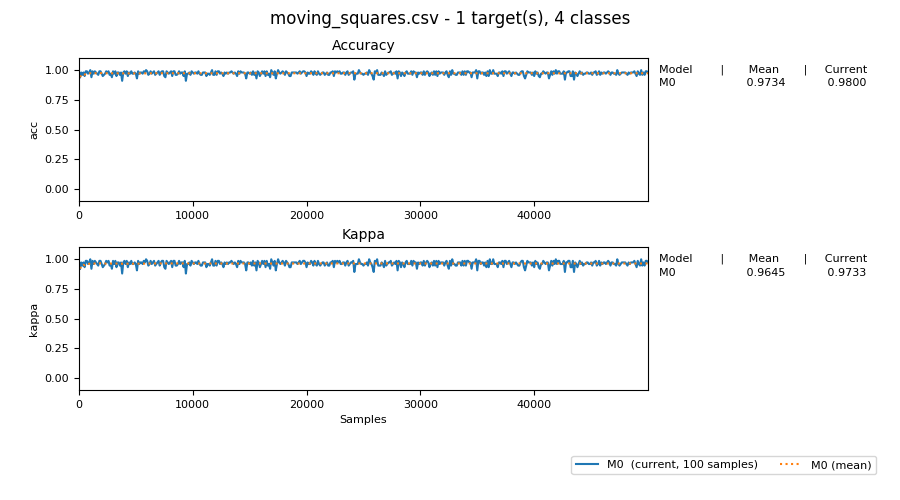

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [20.65s]
Processed samples: 50000
Mean performance:
M0 - Accuracy     : 0.9734
M0 - Kappa        : 0.9645


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='distance')]

In [6]:
# Evaluate
evaluator.evaluate(stream=stream, model=classifier)